In [1]:
#Importing the required Libraries
import numpy as np
import matplotlib.pyplot as plt 



In [2]:
#https://en.wikipedia.org/wiki/Iris_flower_data_set
from scipy.sparse import coo_matrix
from sklearn.datasets import load_iris
from sklearn.utils import shuffle

data = load_iris()
data_values=data.data
class_values=data.target

data_values_sparse = coo_matrix(data_values)     #creates a sparse matrix of size of X

data_values, data_values_sparse, y = shuffle(data_values, data_values_sparse, class_values, random_state=0)
data_values=data_values_sparse.toarray()         
class_values=y

In [3]:
class_values=class_values.reshape(150,1)

#%75 of the data is training data, %25 test data
#we divided data in two parts, so training data will not be used for tests
train_data_values=data_values[0:112,:]
train_class_values=class_values[0:112,:]
test_data_values=data_values[112:,:]
test_class_values=class_values[112:,:]

In [4]:
def sigmoid(sum_term):#sigmoid function used in forward pass to get the class value (activation function)
  for i in range(0,sum_term.shape[0]):
    sum_term[i]=1/(1+np.exp(-1*sum_term[i]))
  return sum_term

Sigmoid Function
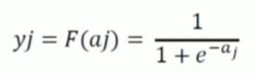

In [5]:
#randomly initaliazing weights and bias
first_weight = np.random.rand(8,4)
bias_first_layer = np.random.rand(8,1)
second_weight = np.random.rand(8,8) #hidden layer
second_bias = np.random.rand(8,1)
third_weight =np.random.rand(3,8) #we need three output neurons, because we have three classes
third_bias = np.random.rand(3,1)

In [14]:
def printTrainingCosts(algorithm_values):
 i=algorithm_values['No_of_Iter']
 iter=np.arange(0,i)
 error=algorithm_values['cost']
 plt.plot(iter,error)
 plt.xlabel('#Iterations')
 plt.ylabel('Error/Costs')
 plt.show

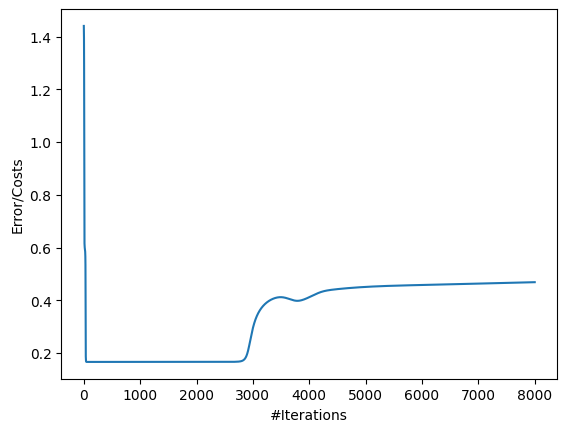

In [31]:
def calculateSumTerm(weight, value, bias):
    sum_term = np.dot(weight,value) + bias #computes dot product of weight and train data value
    return sum_term, sigmoid(sum_term)

def calculateMeanSquaredError(target_value,calculated_value):
    return 1/2*np.sum(pow((target_value-calculated_value),2)) 
    
def forwardPropagation(X,Y,algorithm_values2):
    algorithm_values ={}
    first_weight=algorithm_values2["first_weight"]
    second_weight=algorithm_values2["second_weight"]
    third_weight=algorithm_values2["third_weight"]
    
    bias_first_layer = algorithm_values2["bias_first_layer"]
    second_bias = algorithm_values2["second_bias"]
    third_bias = algorithm_values2["third_bias"]
    
    X=np.asarray(X)
    X=X.reshape((4,1))
    
    first_sum_term, first_class_value = calculateSumTerm(first_weight , X ,bias_first_layer)
    scn_sum_term, second_class_value = calculateSumTerm(second_weight , first_class_value, second_bias)
    thrd_sum_term, thrd_class_value = calculateSumTerm(third_weight , second_class_value, third_bias)
    
    #according to this value, we will calculate how much should we update the weights
    #if the error is high, that means we should make a big change in weights 
    error= calculateMeanSquaredError(Y,thrd_class_value)
    
    algorithm_values["first_class_value"]=first_class_value
    algorithm_values["second_class_value"]=second_class_value
    algorithm_values["thrd_class_value"]=thrd_class_value
    algorithm_values["first_sum_term"]=first_sum_term
    algorithm_values["scn_sum_term"]=scn_sum_term
    algorithm_values["thrd_sum_term"]=thrd_sum_term
    algorithm_values["err"]=error
    
    return algorithm_values

def backpropagation(X,y,learning_rate,algorithm_values,algorithm_values2):
  first_class_value=algorithm_values["first_class_value"]
  second_class_value=algorithm_values["second_class_value"]
  thrd_class_value=algorithm_values["thrd_class_value"]
  first_sum_term=algorithm_values["first_sum_term"]
  scn_sum_term=algorithm_values["scn_sum_term"]
  thrd_sum_term=algorithm_values["thrd_sum_term"]
  error=algorithm_values["err"]
  first_weight=algorithm_values2["first_weight"]
  second_weight=algorithm_values2["second_weight"]
  third_weight=algorithm_values2["third_weight"]
  bias_first_layer=algorithm_values2["bias_first_layer"]
  second_bias=algorithm_values2["second_bias"]
  third_bias=algorithm_values2["third_bias"]
  
  y1=np.zeros((3,1))
  y1[y]=1
  
  thrd_class_value=thrd_class_value.reshape((3,1))
  second_class_value=second_class_value.reshape((8,1))
  first_class_value = first_class_value.reshape((8,1))
  
  X=np.asarray(X)
  X=X.reshape((4,1))
    
  #calculated_y*(1-calculated_y)*(ytarget-calculated_y)
  temp_value = updateWeights(True, thrd_class_value, y1, 0, 0)
  temp2_value = updateWeights(False, second_class_value, 0, temp_value, third_weight)
  temp3_value = updateWeights(False, first_class_value, 0, temp2_value, second_weight)

  third_weight = third_weight -(learning_rate)*(np.dot(temp_value,second_class_value.T))
  third_bias = third_bias-(learning_rate)*temp_value
  second_weight = second_weight-(learning_rate)*(np.dot(temp2_value,first_class_value.T))
  second_bias = second_bias-(learning_rate)*temp2_value
  first_weight = first_weight-(learning_rate)*(np.dot(temp3_value,X.T))            
  bias_first_layer1=bias_first_layer-(learning_rate)*(temp3_value)
  
  algorithm_values2["first_weight"] = first_weight
  algorithm_values2["second_weight"] = second_weight 
  algorithm_values2["third_weight"]= third_weight
  algorithm_values2["bias_first_layer"] = bias_first_layer
  algorithm_values2["second_bias"] =second_bias
  algorithm_values2["third_bias"] =third_bias
 
  return algorithm_values2

def updateWeights(output_or_not, calculated_y, target_y, output_value, weight):
  if(output_or_not == True):
    return np.multiply(calculated_y - target_y, np.multiply(calculated_y, np.ones(calculated_y.shape) - calculated_y))
  else:
    return np.multiply(np.dot(output_value.transpose(),weight).T,np.multiply(calculated_y,np.ones(calculated_y.shape)-calculated_y))
    
    
def main(X,y):
  max_iter=8000
  learning_rate=0.01
  weights={}
  cost_list=[]
  weights["first_weight"]=first_weight
  weights["second_weight"]=second_weight
  weights["third_weight"]=third_weight
  weights["bias_first_layer"]=bias_first_layer
  weights["second_bias"]=second_bias
  weights["third_bias"]=third_bias
  weights['No_of_Iter']=max_iter

  while(True):
    for i in range(1,X.shape[0]):
      d1=forwardPropagation(X[i],y[i],weights)
      weights=backpropagation(X[i],y[i],learning_rate,d1,weights)
      curr_error=d1["err"]
    max_iter=max_iter-1
    if(max_iter<0):
      break
    final=d1["err"]
    cost_list.append(final)
  weights['cost']=cost_list
  return weights

ans=main(train_data_values,train_class_values)
printTrainingCosts(ans)

#finding class
def findMaxValue(array):
 max_value = -1
 index = -1
 if (array[0] > array[1]):
    max_value = array[0]
    index = 0
 else:
    max_value = array[1]
    index = 1
 if(array[2] > max_value):
    max_value = array[2]
    index = 2
 return index;   

#Predicting
def predictAndCalculateAccuracy():
 accuracy = 0   
 for value in test_class_values:
   pred=forwardPropagation(test_data_values[value],test_class_values[value],ans);
   print(test_data_values[value])
   index = findMaxValue(pred["thrd_class_value"])
   if(index == 0):
    print("I. setosa")
   elif(index == 1):
    print("I. versicolor")
   else:
    print("I. virginica")
   if(index == test_class_values[value]):
    accuracy = accuracy + 1
   print(index)
   print(test_class_values[value])
 print("Test accuracy rate:")
 print(accuracy/38)


Function used for calculating sum term during forward propagation
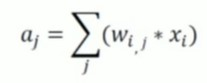

Updating weights during backpropagation
Code lines between: 72-81
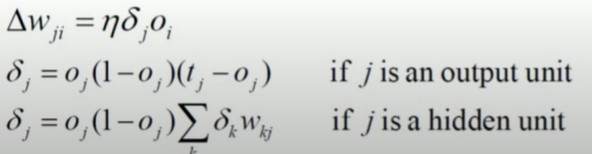

In [32]:
predictAndCalculateAccuracy()

[[5.4 3.4 1.5 0.4]]
I. setosa
0
[[0]]
[[6.4 2.9 4.3 1.3]]
I. versicolor
1
[[1]]
[[7.7 2.6 6.9 2.3]]
I. virginica
2
[[2]]
[[5.4 3.4 1.5 0.4]]
I. setosa
0
[[0]]
[[7.7 2.6 6.9 2.3]]
I. virginica
2
[[2]]
[[5.4 3.4 1.5 0.4]]
I. setosa
0
[[0]]
[[6.4 2.9 4.3 1.3]]
I. versicolor
1
[[1]]
[[7.7 2.6 6.9 2.3]]
I. virginica
2
[[2]]
[[6.4 2.9 4.3 1.3]]
I. versicolor
1
[[1]]
[[7.7 2.6 6.9 2.3]]
I. virginica
2
[[2]]
[[6.4 2.9 4.3 1.3]]
I. versicolor
1
[[1]]
[[6.4 2.9 4.3 1.3]]
I. versicolor
1
[[1]]
[[7.7 2.6 6.9 2.3]]
I. virginica
2
[[2]]
[[6.4 2.9 4.3 1.3]]
I. versicolor
1
[[1]]
[[7.7 2.6 6.9 2.3]]
I. virginica
2
[[2]]
[[5.4 3.4 1.5 0.4]]
I. setosa
0
[[0]]
[[5.4 3.4 1.5 0.4]]
I. setosa
0
[[0]]
[[5.4 3.4 1.5 0.4]]
I. setosa
0
[[0]]
[[7.7 2.6 6.9 2.3]]
I. virginica
2
[[2]]
[[7.7 2.6 6.9 2.3]]
I. virginica
2
[[2]]
[[5.4 3.4 1.5 0.4]]
I. setosa
0
[[0]]
[[5.4 3.4 1.5 0.4]]
I. setosa
0
[[0]]
[[6.4 2.9 4.3 1.3]]
I. versicolor
1
[[1]]
[[5.4 3.4 1.5 0.4]]
I. setosa
0
[[0]]
[[7.7 2.6 6.9 2.3]]
I. virginica
2
[